# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


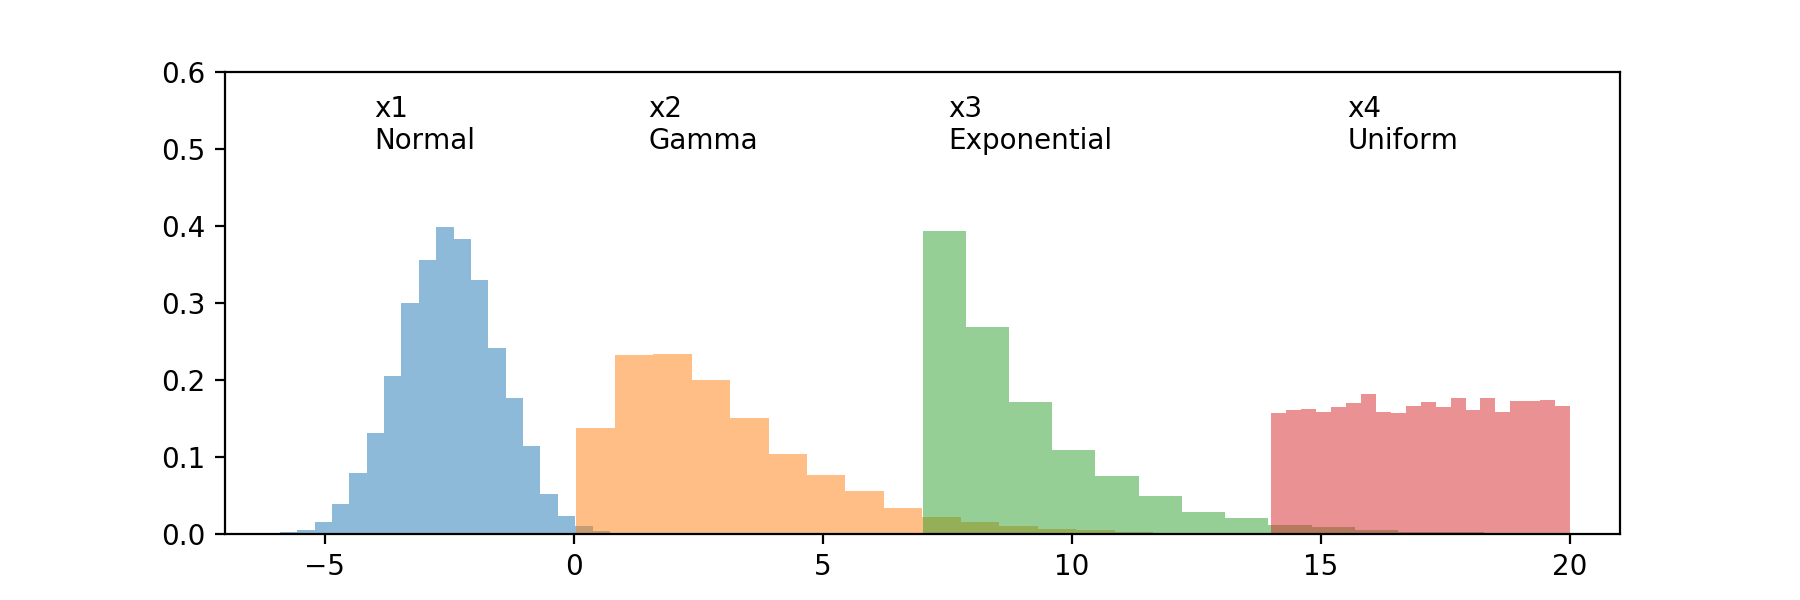

Text(15.5306,0.5,'x4\nUniform')

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, density=True, bins=20, alpha=0.5)
plt.hist(x2, density=True, bins=20, alpha=0.5)
plt.hist(x3, density=True, bins=20, alpha=0.5)
plt.hist(x4, density=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


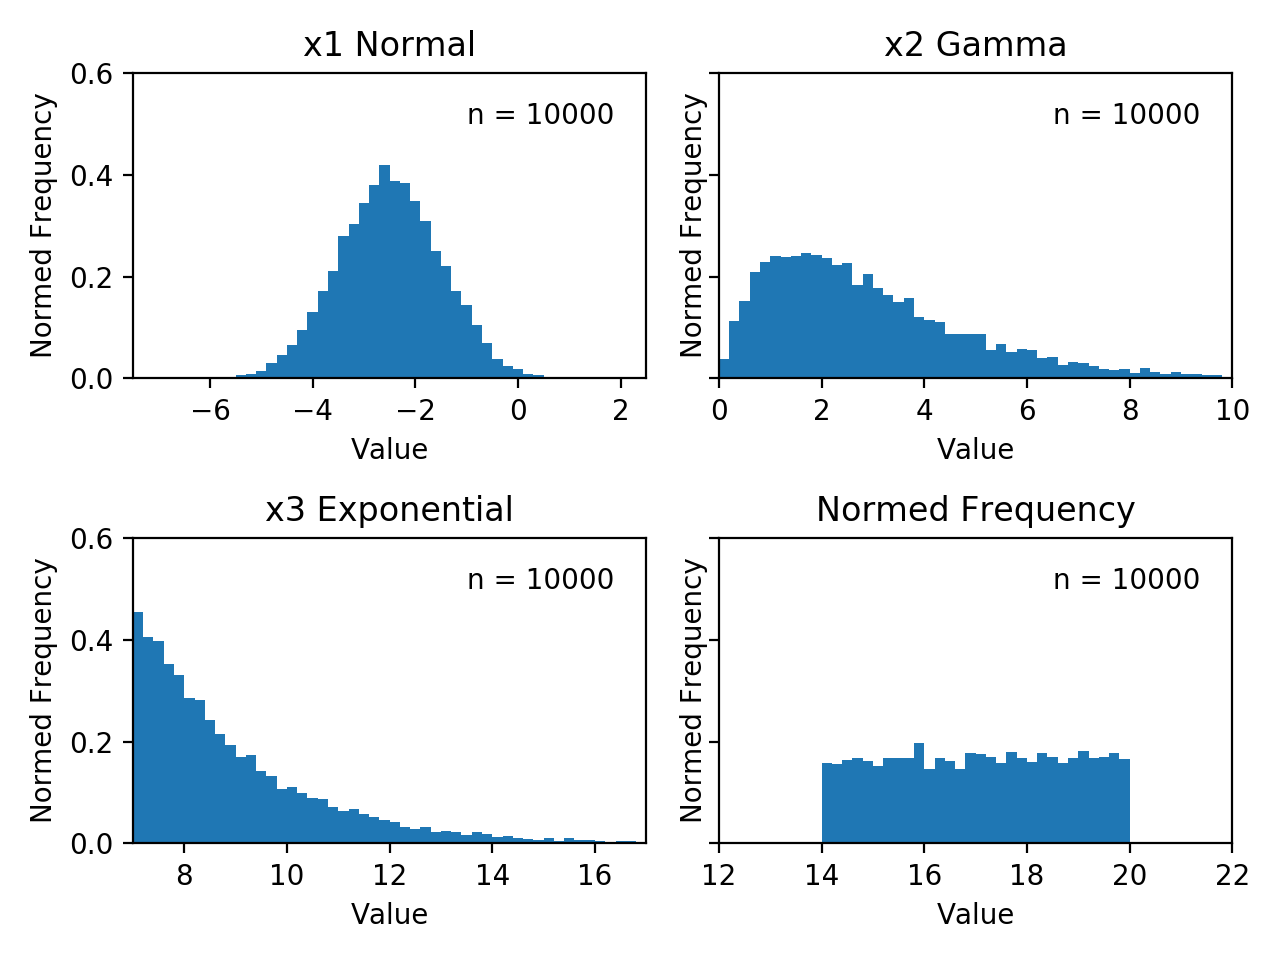

In [22]:
import matplotlib.animation as animation

x = [x1, x2, x3, x4]
axis = [
    [-7.5, 2.5, 0, 0.6],
    [0, 10, 0, 0.6],
    [7, 17, 0, 0.6],
    [12, 22, 0, 0.6]
]
titles = ['x1 Normal', 'x2 Gamma', 'x3 Exponential', 'Normed Frequency']
bins1 = np.arange(-7.5, 2.5, 0.2)
bins2 = np.arange(0, 10, 0.2)
bins3 = np.arange(7, 17, 0.2)
bins4 = np.arange(12, 22, 0.2)
bins = [bins1, bins2, bins3, bins4]
# the xy place is according the xy-axis of the ax
anno_x = [-1, 6.5, 13.5, 18.5]
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey=True)
ax = [ax1, ax2, ax3, ax4]
def update(curr):
    if curr == 100:
        a.event_source.stop()
    for i in range(4):
        ax[i].cla()
        ax[i].hist(x[i][:100*curr], bins=bins[i], normed=True)
        ax[i].axis(axis[i])
        ax[i].set_title(titles[i])
        ax[i].set_xlabel("Value")
        ax[i].set_ylabel("Normed Frequency")
        ax[i].annotate("n = {}".format(100*curr), [anno_x[i], 0.5])
    plt.tight_layout()
a = animation.FuncAnimation(fig, update, interval=100)
